# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [130]:
import pandas as pd

tabela = pd.read_csv("advertising.csv")

display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

,TV,Radio,Jornal,Vendas
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Jornal,0.056648,0.354104,1.000000,0.157960
Vendas,0.901208,0.349631,0.157960,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

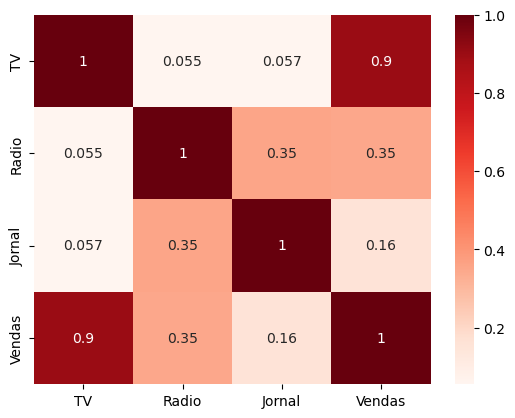

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
# calcular a correlação correlação vai de 0 a 1

display(tabela.corr())

# indica que provavelmente que as vendas da TV vai impactar muito mais na previsão de vendas do que o RADIO e o JORNAL

# criar um grafico para facilitar a visualização da correlação utilizando o matplaotlib e o seaborn

# criar grafico
sns.heatmap(tabela.corr(), cmap="Reds", annot=True)
# exibe o grafico
plt.show

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [132]:
from sklearn.model_selection import train_test_split
y = tabela["Vendas"] # dados de Y são quem eu quero prever
x = tabela[["TV", "Radio", "Jornal"]] # dados de X são todos os outros dados


x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, random_state=1)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [133]:
# importar a inteligencia artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar a inteligencia artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar a inteligencia artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [134]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.9048917241361681
0.9655924108865868


#### Visualização Gráfica das Previsões

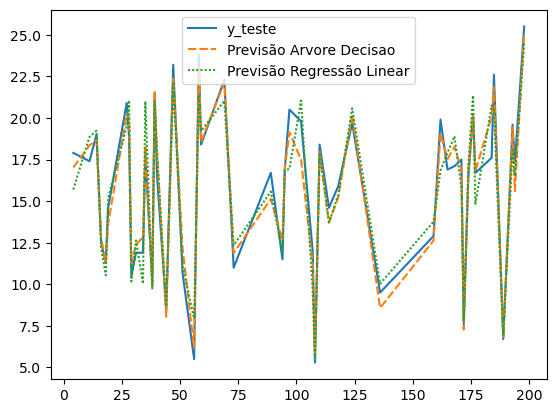

In [135]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar["y_teste"] = y_teste
tabela_auxiliar["Previsão Arvore Decisao"] = previsao_arvoredecisao
tabela_auxiliar["Previsão Regressão Linear"] = previsao_regressaolinear
# display(tabela_auxiliar)
sns.lineplot(data=tabela_auxiliar)
plt.show()

#### Como fazer uma nova previsão?

In [136]:
# importar nova base de dados com os dados que eu quero verificar
# prever com a IA os dados de Vendas
tabela_novaprevisao = pd.read_csv("novos.csv")

display(tabela_novaprevisao)

# importar nova base de dados com os dados que eu quero verificar

previsao = modelo_arvoredecisao.predict(tabela_novaprevisao)
display(previsao)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


array([ 7.743,  8.62 , 20.023])

In [137]:
# Carregue o arquivo CSV
df = pd.read_csv('novos.csv')

# Adicione uma nova coluna ao DataFrame
df["Vendas"] = 0

line = previsao
part1 = line[:len(line)//3]
part2 = line[len(line)//3: 2*len(line)//3]
part3 = line[2*len(line)//3:]

# Adiciona dados a nova coluna
df.loc[df['TV'] == 'Sim', 'Vendas'] = 1

# Reescreve linhas existentes para os valores de part1, part2 e part3
df.iloc[0, df.columns.get_loc('Vendas')] = part1
df.iloc[1, df.columns.get_loc('Vendas')] = part2
df.iloc[2, df.columns.get_loc('Vendas')] = part3

# Salve as alterações no arquivo CSV
df.to_excel('dados.xlsx', index=False)

In [138]:
import pyautogui as pg
import pyperclip as pc
import time


pg.hotkey("ctrl", "t")
pc.copy("https://mail.google.com/mail/u/0/?tab=rm&ogbl#inbox")
pg.hotkey("ctrl", "v")
pg.press("enter")

time.sleep(2)

pg.click(x=71, y=171)
pg.write("gugadutra07@gmail.com")
pg.press("enter")
pg.press("tab")
pc.copy("Previsão de Vendas para os proximos 3 mêses")
pg.hotkey("ctrl", "v")
pg.press("tab")

texto = f"""
Prezados, bom dia

Segue em anexo a previsão de vendas para os proximos 3 mêses

Abs
Gustavo"""

pc.copy(texto)
pg.hotkey("ctrl", "v")

pg.press("win")
pg.write("aula 4")
pg.press("enter")
time.sleep(2)
pg.hotkey("down", "down", "down", "down", "down", "down", "down")
pg.hotkey("alt", "tab")
pg.hotkey("ctrl", "v")

pg.hotkey("ctrl", "enter")

In [139]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install openpyxl